In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from JSAnimation import IPython_display
from matplotlib import animation

Populating the interactive namespace from numpy and matplotlib


In [2]:
class Agente:
    """ Agente general """
    def __init__(self, tipo, locacion):
        self.tipo = tipo
        self.locacion = np.array(locacion)
        self.siguiente_accion = None

    def distancia(self, otro):
        "Calcula la distancia euclídea entre este agente y otro."
        return np.linalg.norm(self.locacion - otro.locacion)  # Otra manera es usar np.sqrt(np.sum((a-b)**2))
    
    def vecinos(self, agentes):
        pass
    
    def actuar(self, agentes):
        self.locacion =  self.siguiente_accion
        
    def decidir(self, agentes):
        self.siguiente_accion = np.array([random.uniform(0, 1), random.uniform(0, 1)]) # Toma una nueva posición al azar
    
    def actualizar(self, agentes):
        self.decidir(agentes)
        self.actuar(agentes)

In [3]:
class Mundo:
    def __init__(self, agentes, ancho=15, alto=15, steps = 10):
        self.agentes = agentes
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.init_anim()
            
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 10), ylim=(0, 10))
        x_values_0, y_values_0 = [], []
        self.ax.set_axis_bgcolor('azure')
        plot_args = {'markersize' : 8, 'alpha' : 1}
        for agente in self.agentes:
            x, y = agente.locacion
            x_values_0.append(x)
            y_values_0.append(y)
        self.puntos, = self.ax.plot(x_values_0, y_values_0, 'o', **plot_args)
       
       
    def dibujar(self, step):
        x_values_0, y_values_0 = [], []
        for agente in self.agentes:
            x, y = agente.locacion
            x_values_0.append(x)
            y_values_0.append(y)

        self.puntos.set_data(x_values_0, y_values_0)
        
        self.ax.set_title('Tiempo {}'.format(step))
        
        return self.puntos,
       
    def actualizar(self, step):   
        self.dibujar(step) # Dibuja el mundo
        
        for agente in self.agentes:
            agente.actualizar(self.agentes)
    
    def clean_screen(self):
        self.puntos.set_data([], [])
        return self.puntos,
          
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func=self.clean_screen, frames=self.steps, interval=100, blit=False)
        return anim

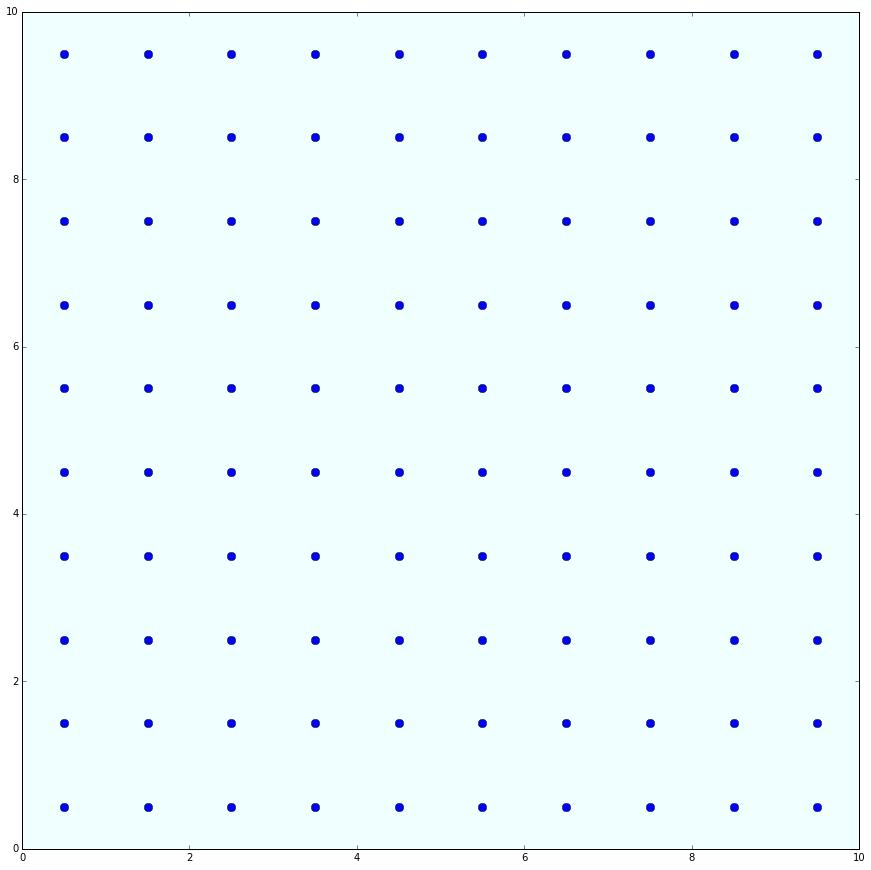

In [4]:
num_agentes = 100
posiciones = [(i+.5,j+.5) for i in range(0,10)for j in range(0,10)]
agentes_simples = [Agente(tipo=0,locacion = posiciones[i]) for i in range(num_agentes)]

len(agentes_simples)

sin_chiste = Mundo(agentes = agentes_simples, steps = 10)

#sin_chiste.simular()

In [5]:
area_n = np.random.rand()
area_b = np.random.rand()
while (area_n + area_b) > 1:
    area_n = np.random.rand()
    area_b = np.random.rand()
area_f = 1 - (area_n + area_b)

#negras = int(round(area_n*100))
#blancas = int (round(area_b*100))
#fertil = int(round(area_f*100))
negras = 1
blancas = 1
fertil = 98

In [6]:
num_agentes = 100
posiciones = [(i+.5,j+.5) for i in range(0,10)for j in range(0,10)]

In [7]:
po_neg=[]
for i in  range(negras): 
    n = np.random.choice(100-i)
    po_neg.append(posiciones.pop(n))  
   

In [8]:
po_blan = []
k = 100-negras
for i in  range(blancas):
    n = np.random.choice(k-i)
    po_blan.append(posiciones.pop(n))


In [9]:
po_neg;

In [10]:
po_blan;

In [11]:
posiciones;

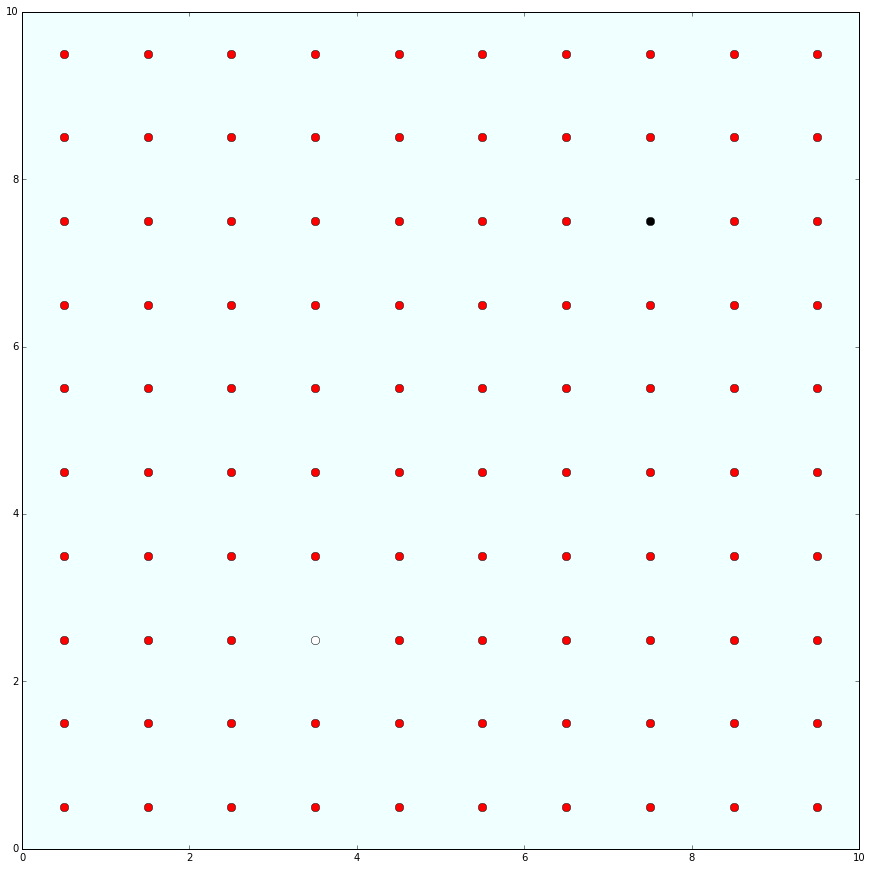

In [14]:
agentes = [Agente(tipo=0,locacion = po_neg[i]) for i in range(negras)]
agentes.extend(Agente(tipo=1,locacion= po_blan[i]) for i in range(blancas))
agentes.extend(Agente(tipo=2,locacion= posiciones[i]) for i in range(fertil))

sin_chiste = Mundo2(agentes = agentes, steps = 10)


In [13]:
class Mundo2:
    def __init__(self, agentes, ancho=15, alto=15, steps = 10):
        self.agentes = agentes
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.init_anim()
            
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 10), ylim=(0, 10))
        x_values_0, y_values_0 = [], []
        x_values_1, y_values_1 = [], []
        x_values_2, y_values_2 = [], []
        
        self.ax.set_axis_bgcolor('azure')
        plot_args = {'markersize' : 8, 'alpha' : 1}
        for agente in self.agentes:
            x, y = agente.locacion
            if agente.tipo == 0:
                x_values_0.append(x)
                y_values_0.append(y)
                
            if agente.tipo == 1:
                    x_values_1.append(x)
                    y_values_1.append(y)
            if agente.tipo == 2:
                    x_values_2.append(x)
                    y_values_2.append(y)        
            
        self.puntos_0, = self.ax.plot(x_values_1, y_values_1, 'o',  markerfacecolor='white',**plot_args)
        self.puntos_1, = self.ax.plot(x_values_0, y_values_0, 'o', markerfacecolor='black', **plot_args)
        self.puntos_2, = self.ax.plot(x_values_2, y_values_2, 'o', markerfacecolor='red', **plot_args)
       
    def dibujar(self, step):
        x_values_0, y_values_0 = [], []
        for agente in self.agentes:
            
            x_values_0.append(x)
            y_values_0.append(y)

        self.puntos.set_data(x_values_0, y_values_0)
        
        self.ax.set_title('Tiempo {}'.format(step))
        
        return self.puntos,
       
    def actualizar(self, step):   
        self.dibujar(step) # Dibuja el mundo
        
        for agente in self.agentes:
            agente.actualizar(self.agentes)
    
    def clean_screen(self):
        self.puntos.set_data([], [])
        return self.puntos,
          
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func=self.clean_screen, frames=self.steps, interval=100, blit=False)
        return anim